Fundamental Frequency: 66.10000000000001 Hz
Harmonics found at:
None


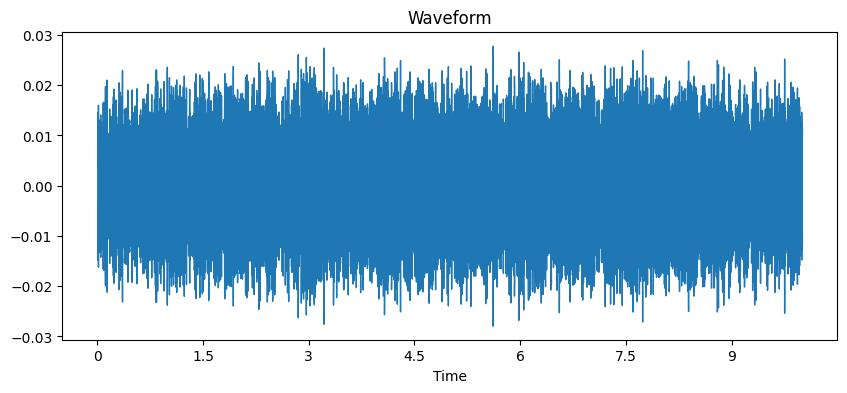

In [2]:
import numpy as np
import scipy.fft
import matplotlib.pyplot as plt
import librosa
import librosa.display
import sys

def find_harmonics(signal, sr, threshold=0.1):
    # Perform FFT
    spectrum = scipy.fft.fft(signal)
    freq = scipy.fft.fftfreq(len(signal), d=1/sr)

    # Take the magnitude
    magnitude = np.abs(spectrum)

    # Find the fundamental frequency
    fundamental_freq = freq[np.argmax(magnitude[:len(magnitude)//2])]

    # Find harmonics
    harmonics = []
    for i in range(2, 10):  # Check first 10 harmonics
        harmonic_freq = fundamental_freq * i
        # Find the closest frequency in FFT result
        index = np.argmin(np.abs(freq - harmonic_freq))
        if magnitude[index] > threshold * np.max(magnitude):
            harmonics.append((harmonic_freq, magnitude[index]))

    return fundamental_freq, harmonics

# Load a sound file (replace 'path_to_file' with your file path)
path_to_file = "../../../dataset/mimii/fan/id_00/abnormal/00000020.wav"
signal, sr = librosa.load(path_to_file, sr=None)

# Find harmonics
fundamental_freq, harmonics = find_harmonics(signal, sr)

# Print results
print(f"Fundamental Frequency: {fundamental_freq} Hz")
print("Harmonics found at:")
if len(harmonics) == 0:
    print("None")

for freq, mag in harmonics:
    print(f"Frequency: {freq} Hz, Magnitude: {mag}")

# Plotting
plt.figure(figsize=(10, 4))
librosa.display.waveshow(signal, sr=sr)
plt.title('Waveform')
plt.show()
